In [45]:
# ## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modules from Scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# 주피터 노트북 내에서 그래프를 바로 볼 수 있도록 설정
%matplotlib inline

In [47]:
# ## 2. EDA - Exploratory Data Analysis
df = pd.read_csv('유방암 dataset.csv')

# head 5줄로 내용 확인
print("### Check head 5 ###")
print(df.head())
print("\n" + "="*50 + "\n")

# 데이터의 전체적인 정보(컬럼별 데이터 타입, Null 값 유무)를 확인
# 'Unnamed: 32' 컬럼에 모든 값이 Null(결측치)인 것을 확인할 수 있음
print("### 데이터 정보 요약 ###")
df.info()
print("\n" + "="*50 + "\n")

### Check head 5 ###
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  a

In [49]:
# ## 3. Preprocessing
# 불필요한 컬럼 제거, 데이터를 정리

# 'id' 컬럼과 모든 값이 비어있는 'Unnamed: 32' 컬럼을 제거
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# 'diagnosis' 컬럼의 값을 머신러닝 모델이 이해할 수 있도록 숫자 형태로 변환
# 악성(Malignant)은 1, 양성(Benign)은 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 전처리 중간확인
print("### 전처리 후 데이터 상위 5개 행 ###")
print(df.head())
print("\n" + "="*50 + "\n")

### 전처리 후 데이터 상위 5개 행 ###
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  .

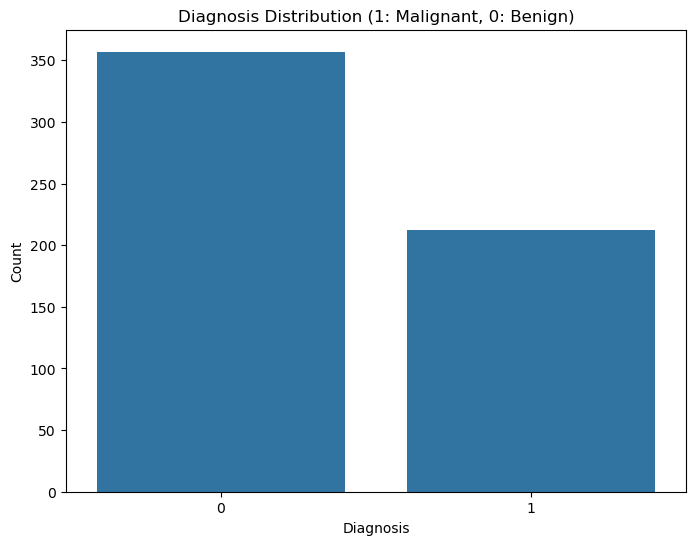

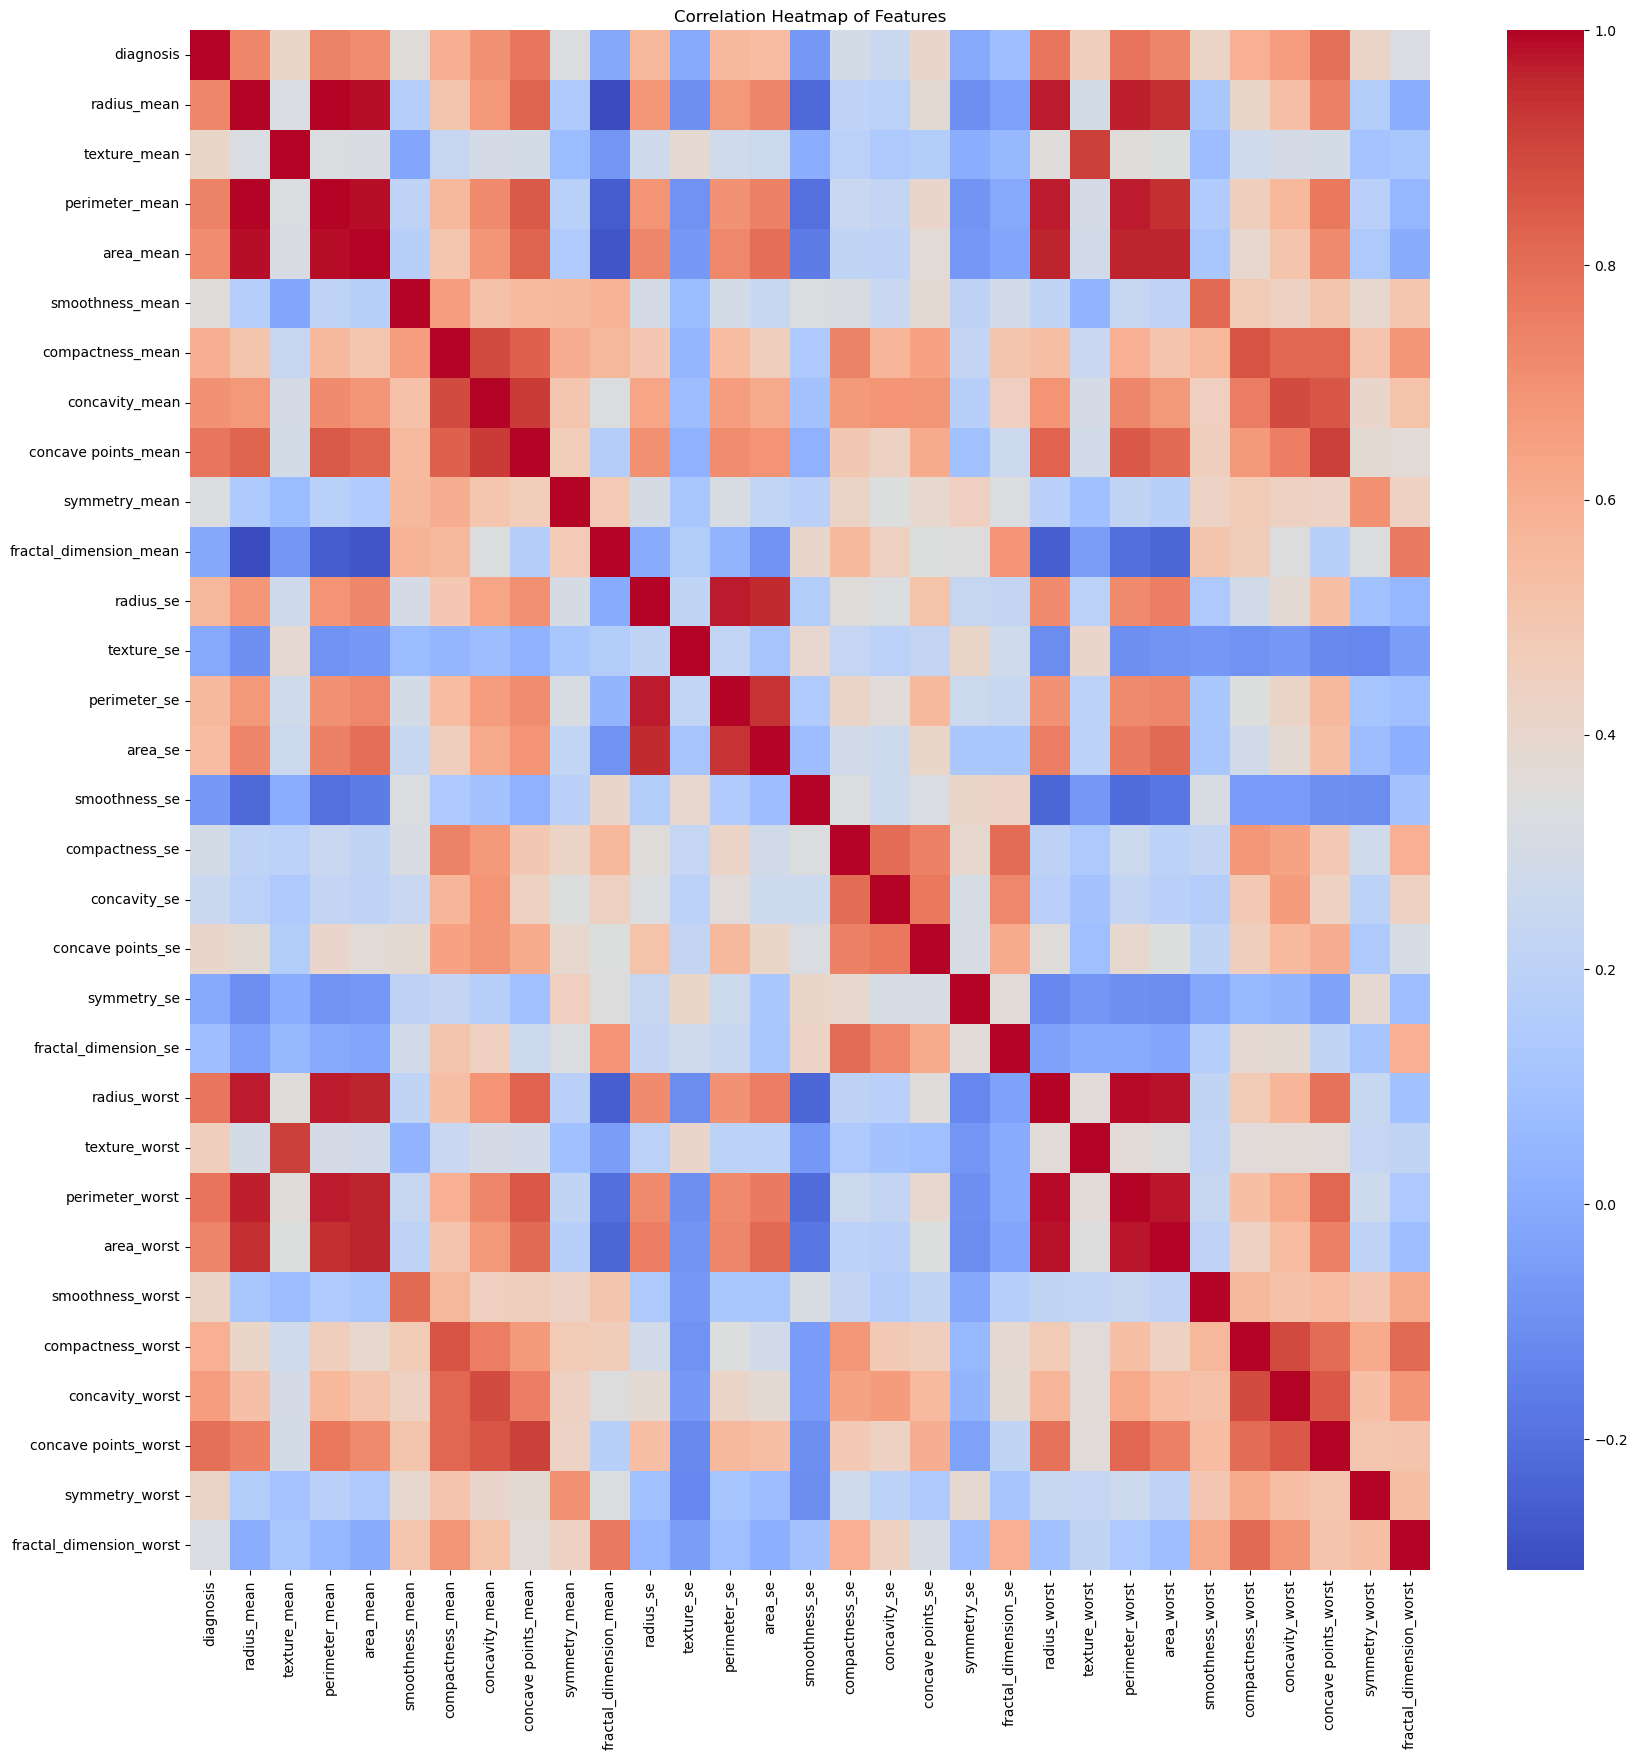

In [51]:
# ## 4. Visualization
# 데이터의 특징과 분포 그래프화

# 1. 악성(1)과 양성(0) 종양의 개수 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Distribution (1: Malignant, 0: Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# 2. 각 특징(feature)들 간의 상관관계를 히트맵으로 시각화
# 어떤 특징들이 서로 관련이 깊은지 한눈에 확인 가능
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [52]:
# ## 5. 학습을 위한 데이터 준비
# feature (X)와 label (y), train/test dataset 설정

# 'diagnosis' 컬럼을 제외한 모든 컬럼을 X (특징 데이터)로 설정
X = df.drop('diagnosis', axis=1)
# 'diagnosis' 컬럼을 y (타겟 데이터)로 설정
y = df['diagnosis']

# 전체 데이터를 train (80%)과 test (20%)으로 분리
# random_state=42는 코드를 다시 실행해도 항상 똑같은 방식으로 데이터가 나뉘도록 보장
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("\n" + "="*50 + "\n")

Train set shape: (455, 30) (455,)
Test set shape: (114, 30) (114,)




In [55]:
# ## 6. Feature Scaling
# 각 데이터의 단위와 범위를 맞춰주어 모델이 더 안정적으로 학습

# StandardScaler 객체 생성
scaler = StandardScaler()

# X_train를 기준으로 스케일러를 학습(fit)시키고, 변환(transform)
X_train_scaled = scaler.fit_transform(X_train)

# X_test는 학습용 데이터 기준으로 변환만 수행 (중요)
X_test_scaled = scaler.transform(X_test)

### Model 1: Logistic Regression ###
Accuracy: 0.9649
Precision: 0.9750
Recall: 0.9286
F1 Score: 0.9512
ROC AUC: 0.9960


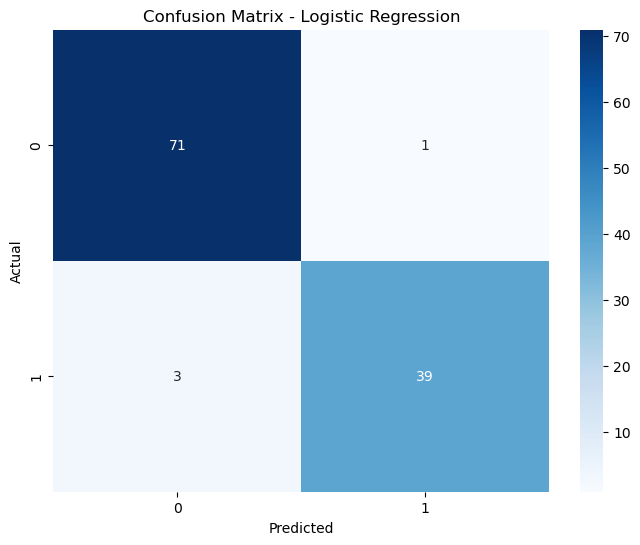

In [63]:
# ## 7. ML model 학습 및 평가

# ### Model 1: Logistic Regression
print("### Model 1: Logistic Regression ###")
# 모델을 생성하고 학습
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측 수행
pred_lr = model_lr.predict(X_test_scaled)
# ROC Curve를 위한 확률값 계산 코드
proba_lr = model_lr.predict_proba(X_test_scaled)[:, 1]

# 성능 평가
accuracy_lr = accuracy_score(y_test, pred_lr)
precision_lr = precision_score(y_test, pred_lr)
recall_lr = recall_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr)
roc_auc_lr = roc_auc_score(y_test, model_lr.predict_proba(X_test_scaled)[:, 1])

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"ROC AUC: {roc_auc_lr:.4f}")

# Confusion Matrix 시각화
cm_lr = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n" + "="*50 + "\n")

### Model 2: Random Forest ###
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1 Score: 0.9630
ROC AUC: 0.9929


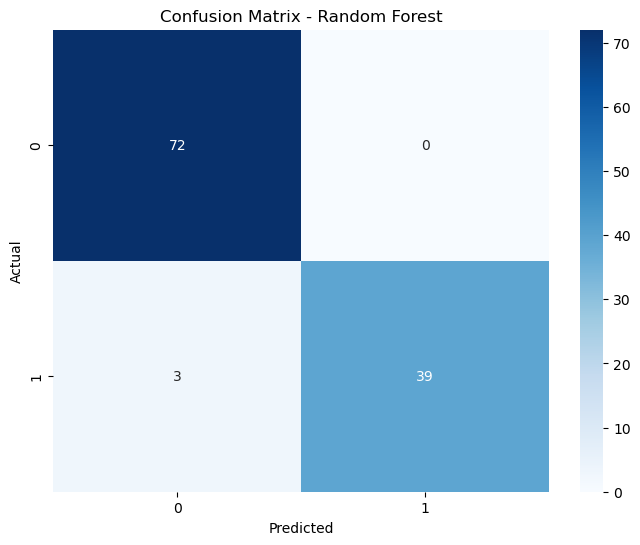

In [65]:
# ### Model 2: Random Forest
print("### Model 2: Random Forest ###")
# 모델을 생성하고 학습
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측 수행
pred_rf = model_rf.predict(X_test_scaled)
proba_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

# 성능을 평가
accuracy_rf = accuracy_score(y_test, pred_rf)
precision_rf = precision_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf)
roc_auc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test_scaled)[:, 1])

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")

# Confusion Matrix을 시각화
cm_rf = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n" + "="*50 + "\n")

### Model 3: Support Vector Machine (SVM) ###
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1 Score: 0.9630
ROC AUC: 0.9947


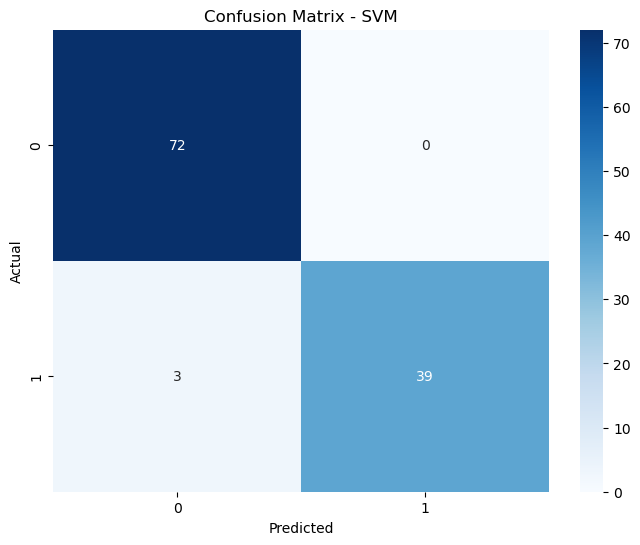

In [67]:
# ### Model 3: Support Vector Machine - SVM
print("### Model 3: Support Vector Machine (SVM) ###")

model_svm = SVC(probability=True, random_state=42)
model_svm.fit(X_train_scaled, y_train)
pred_svm = model_svm.predict(X_test_scaled)
proba_svm = model_svm.predict_proba(X_test_scaled)[:, 1] # ROC Curve를 위한 확률값

# 성능 평가
accuracy_svm = accuracy_score(y_test, pred_svm)
precision_svm = precision_score(y_test, pred_svm)
recall_svm = recall_score(y_test, pred_svm)
f1_svm = f1_score(y_test, pred_svm)
roc_auc_svm = roc_auc_score(y_test, proba_svm)

print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"ROC AUC: {roc_auc_svm:.4f}")

# 혼동 행렬 시각화
cm_svm = confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n" + "="*50 + "\n")

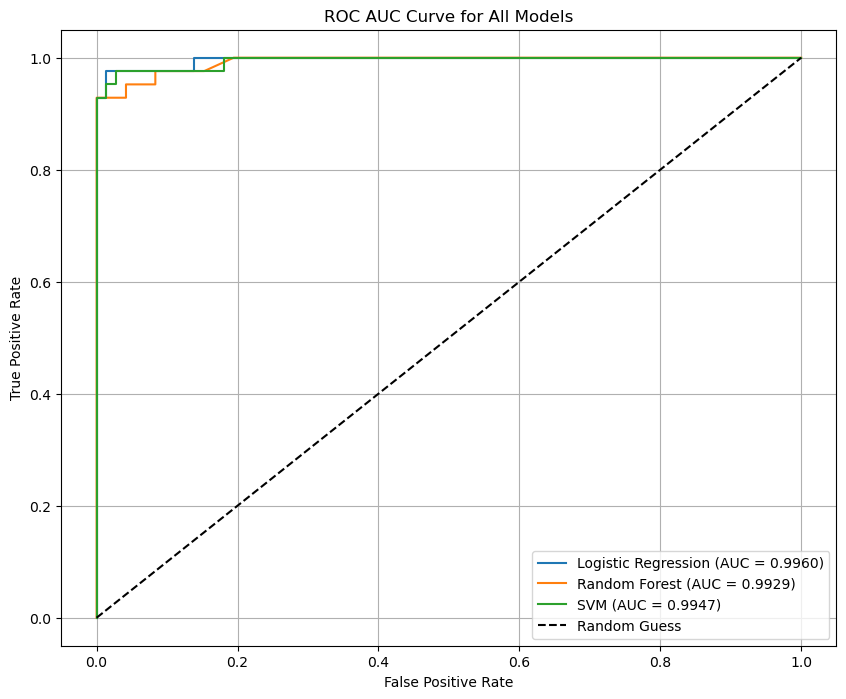

In [69]:
# ## 4. Comparison of Models: ROC AUC Curve

# 각 모델의 ROC Curve 계산
fpr_lr, tpr_lr, _ = roc_curve(y_test, proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, proba_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, proba_svm)

# ROC Curve 시각화
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess') # 기준선

plt.title('ROC AUC Curve for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()
print("\n" + "="*50 + "\n")

In [61]:
# ## 8. 결론
# 두 모델의 성능을 비교

print("### 최종 성능 비교 ###")
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_svm],
    'Precision': [precision_lr, precision_rf, precision_svm],
    'Recall': [recall_lr, recall_rf, recall_svm],
    'F1 Score': [f1_lr, f1_rf, f1_svm],
    'ROC AUC': [roc_auc_lr, roc_auc_rf, roc_auc_svm]
}
df_results = pd.DataFrame(results)
print(df_results)

### 최종 성능 비교 ###
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.964912      0.975  0.928571  0.951220  0.996032
1        Random Forest  0.973684      1.000  0.928571  0.962963  0.992890
2                  SVM  0.973684      1.000  0.928571  0.962963  0.994709
